In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
    Activation,
    GlobalAveragePooling2D,
    Input,
    Add,
)
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import kagglehub
from datetime import datetime
from keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted class: happy


Text(0.5, 1.0, 'Predicted class: happy')

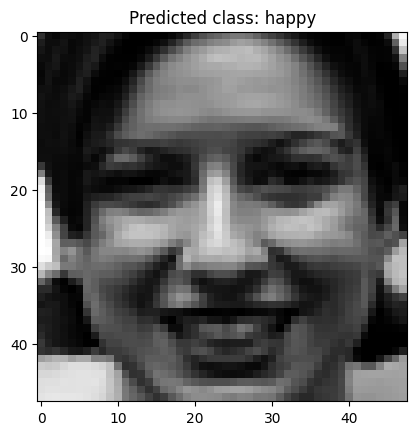

In [ ]:
cam_port = 0
cam = cv2.VideoCapture(cam_port)
result, image = cam.read()
cam.release()
cv2.destroyAllWindows()
dataset_path = os.path.join(os.getcwd(), "CK+48")
labels = os.listdir(dataset_path)
checkpoint_path = "models/model_checkpoint.keras"
model = load_model(checkpoint_path)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=["accuracy"])

image = cv2.resize(image, (48, 48))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
images = [image]
images_x = np.array(images)
images_x = images_x / 255

result = model.predict(images_x)
predicted_class_index = np.argmax(result)
predicted_label = labels[predicted_class_index]
print(f"Predicted class: {predicted_label}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Predicted class: {predicted_label}")

In [22]:
cam_port = 0
count = 0
desired_fps = 30 
font = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10, 20)
fontScale = 0.5
fontColor = (0, 0, 255)
thickness = 1
lineType = 2

dataset_path = os.path.join(os.getcwd(), "CK+48")
labels = os.listdir(dataset_path)
checkpoint_path = "models/model_checkpoint.keras"
model = load_model(checkpoint_path)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=["accuracy"])
prediction_text = "Predicted class: "

In [ ]:
cap = cv2.VideoCapture(cam_port)
cap.set(cv2.CAP_PROP_FPS, desired_fps)
actual_fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Actual FPS: {actual_fps}")

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        count += 1
        if (count % desired_fps) == 0:
            image = cv2.resize(frame, (48, 48))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            images = [image]
            images_x = np.array(images)
            images_x = images_x / 255
            result = model.predict(images_x)
            predicted_class_index = np.argmax(result)
            predicted_label = labels[predicted_class_index]
            prediction_text = f"Predicted class: {predicted_label}"
            print(f"Predicted class: {predicted_label}")
        cap.set(cv2.CAP_PROP_POS_FRAMES, count)
        cv2.putText(frame, prediction_text, 
            bottomLeftCornerOfText, font, fontScale, fontColor, thickness, lineType)
        cv2.imshow('Captured Image', frame)
        if cv2.waitKey(1) & 0xFF == ord('q') or cv2.getWindowProperty('Captured Image', cv2.WND_PROP_VISIBLE) < 1:
            cap.release()
            cv2.destroyAllWindows()
            break
    else:
        cap.release()
        cv2.destroyAllWindows()
        break